# IS4152 Project

Analysing 538 Raw Data

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(8,6)})

## Reading in the polls_data

In [2]:
#Reading Polls
generic_ballot_polls = pd.read_csv("data/polls/generic_ballot_polls.csv")
governor_polls = pd.read_csv("data/polls/governor_polls.csv")
house_polls = pd.read_csv("data/polls/house_polls.csv")
president_polls = pd.read_csv("data/polls/president_polls.csv")
president_approval_polls = pd.read_csv("data/polls/president_approval_polls.csv")
president_primary_polls = pd.read_csv("data/polls/president_primary_polls.csv")
senate_polls = pd.read_csv("data/polls/senate_polls.csv")
generic_ballot_polls.head(n=5)

C:\Users\choon\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,partisan,display_name,...,sponsor_candidate,tracking,nationwide_batch,created_at,notes,url,stage,dem,rep,ind
0,134402,71737,2020,NaN,1610,USC Dornsife/Los Angeles Times,NaN,NaN,NaN,USC Dornsife,...,NaN,True,False,10/23/20 07:50,probabilistic voting question,https://election.usc.edu/,general,51.85,45.08,NaN
1,134205,71635,2020,NaN,1610,USC Dornsife/Los Angeles Times,NaN,NaN,NaN,USC Dornsife,...,NaN,True,False,10/22/20 07:30,probabilistic voting question,https://election.usc.edu/,general,51.80,44.94,NaN
2,134010,71542,2020,NaN,568,YouGov,352,Economist,NaN,YouGov,...,NaN,NaN,False,10/21/20 09:08,NaN,https://docs.cdn.yougov.com/hxop5lpnlj/econTab...,general,47.00,40.00,NaN
3,134011,71542,2020,NaN,568,YouGov,352,Economist,NaN,YouGov,...,NaN,NaN,False,10/21/20 09:08,NaN,https://docs.cdn.yougov.com/hxop5lpnlj/econTab...,general,50.00,43.00,NaN
4,134204,71634,2020,NaN,1189,Morning Consult,NaN,NaN,NaN,Morning Consult,...,NaN,True,False,10/22/20 07:30,NaN,https://morningconsult.com/2020-presidential-e...,general,50.00,42.00,NaN


### Reading in the biden and trump sentiment data

In [4]:
biden_sentiment = pd.read_csv('data/output/biden_1810.csv')
trump_sentiment = pd.read_csv('data/output/trump_1810.csv')
trump_sentiment.head()

,Unnamed: 0,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,...,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,polarity_scores,compounded,neutral,positive,negative,candidate
0,0,1.320000e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,1.600000e+12,1.050534e+09,Joel Stephens,joelstephens7,NaN,...,1.320000e+18,NaN,59,RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co...",-0.3182,0.667,0.127,0.206,Trump
1,3,1.320000e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,1.600000e+12,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,...,NaN,1.320000e+18,21,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.1280,0.800,0.200,0.000,Trump
2,4,1.320000e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,1.600000e+12,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",...,1.320000e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,0.894,0.106,0.000,Trump
3,7,1.320000e+18,@Oliviaj_8 Or they are just Trump supporters. ...,https://twitter.com/EnragedSock/status/1317616...,17/10/2020 23:59,1.600000e+12,1.200000e+18,Enraged Sock Puppet,EnragedSock,NaN,...,NaN,1.320000e+18,-7,Or Trump supporters Which explains lot,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,0.633,0.367,0.000,Trump
4,11,1.320000e+18,@realjosephfrady Avg IQ of a trump supporter: ...,https://twitter.com/LtjgSpace/status/131761637...,17/10/2020 23:59,1.600000e+12,1.060000e+18,LTJG Space Force,LtjgSpace,"Boston, MA",...,NaN,1.320000e+18,23,Avg IQ trump supporter 63maga Cult45,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.2732,0.704,0.296,0.000,Trump


In [14]:
## removing neutral sentiment
trump_sentiment = trump_sentiment[trump_sentiment['neutral']<1]
biden_sentiment = biden_sentiment[biden_sentiment['neutral']<1]

In [15]:
trump_sentiment['timestamp_ms'] = pd.to_datetime(trump_sentiment['created_at'])
biden_sentiment['timestamp_ms'] = pd.to_datetime(biden_sentiment['created_at'])

In [16]:
trump_sentiment.head()

,Unnamed: 0,tweet_id,text,link,created_at,timestamp_ms,user_id,user_name,user_screen_name,user_location,...,retweeted_status_id,in_reply_to_status_id,sarcasm_value,processed_tweets,polarity_scores,compounded,neutral,positive,negative,candidate
0,0,1.320000e+18,"RT @MajorPatriot: ""He's a criminal. He's comm...",https://twitter.com/joelstephens7/status/13176...,17/10/2020 23:59,2020-10-17 23:59:00,1.050534e+09,Joel Stephens,joelstephens7,NaN,...,1.320000e+18,NaN,59,RT Hes criminal Hes committed crimes President...,"{'neg': 0.206, 'neu': 0.667, 'pos': 0.127, 'co...",-0.3182,0.667,0.127,0.206,Trump
1,3,1.320000e+18,@EVR551 TRUMP'S department of defense. The art...,https://twitter.com/Pooch7171/status/131761637...,17/10/2020 23:59,2020-10-17 23:59:00,1.764774e+08,Gruncle Pooch ⚪,Pooch7171,VerticalSafeZoneAboveTheBag,...,NaN,1.320000e+18,21,TRUMPS department defense The article forgot m...,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.1280,0.800,0.200,0.000,Trump
2,4,1.320000e+18,RT @machineiv: Dan Rather gets it.\n\nYou have...,https://twitter.com/jgkoomey/status/1317616370...,17/10/2020 23:59,2020-10-17 23:59:00,1.388302e+08,Jonathan Koomey,jgkoomey,"California, USA",...,1.320000e+18,NaN,-23,RT Dan Rather gets You excuse patting Republic...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,0.894,0.106,0.000,Trump
3,7,1.320000e+18,@Oliviaj_8 Or they are just Trump supporters. ...,https://twitter.com/EnragedSock/status/1317616...,17/10/2020 23:59,2020-10-17 23:59:00,1.200000e+18,Enraged Sock Puppet,EnragedSock,NaN,...,NaN,1.320000e+18,-7,Or Trump supporters Which explains lot,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,0.633,0.367,0.000,Trump
4,11,1.320000e+18,@realjosephfrady Avg IQ of a trump supporter: ...,https://twitter.com/LtjgSpace/status/131761637...,17/10/2020 23:59,2020-10-17 23:59:00,1.060000e+18,LTJG Space Force,LtjgSpace,"Boston, MA",...,NaN,1.320000e+18,23,Avg IQ trump supporter 63maga Cult45,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.2732,0.704,0.296,0.000,Trump


In [17]:
trump_senti_grp = trump_sentiment.groupby('timestamp_ms')['compounded'].mean()
biden_senti_grp = biden_sentiment.groupby('timestamp_ms')['compounded'].mean()

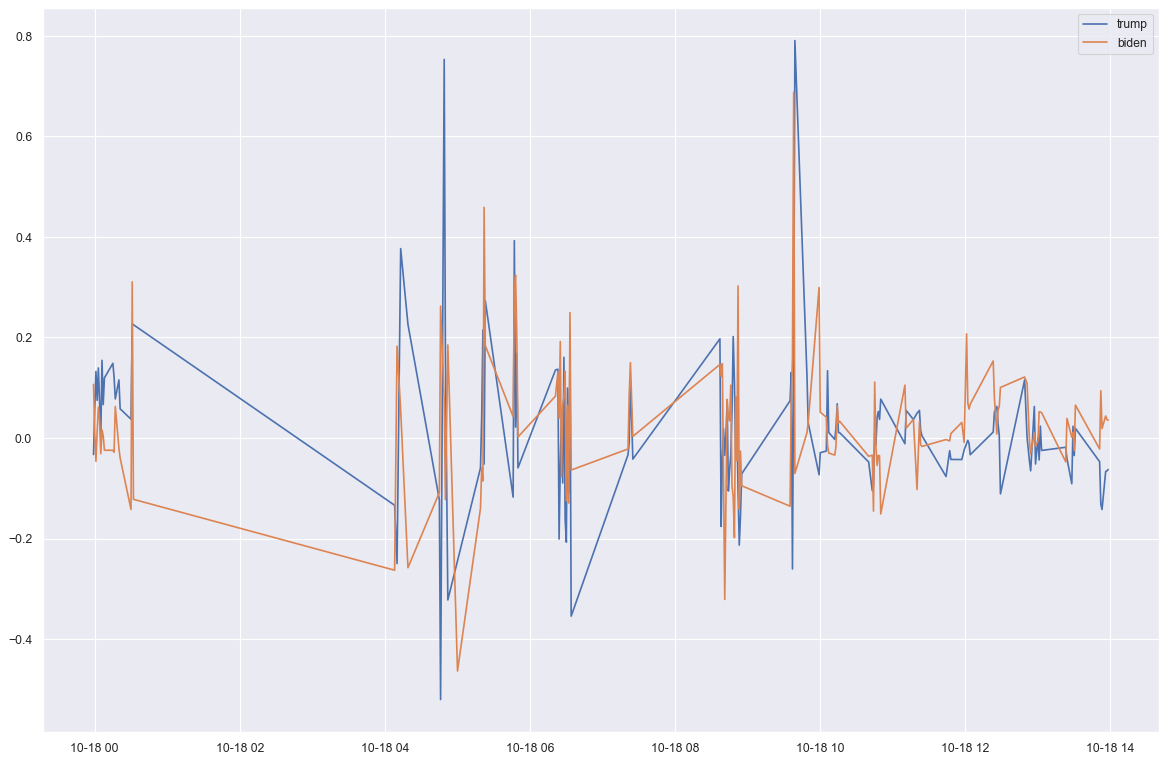

In [23]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(trump_senti_grp,label='trump')
plt.plot(biden_senti_grp,label='biden')
plt.legend()

In [ ]:
poll_types = [generic_ballot_polls, governor_polls, house_polls, president_polls, president_primary_polls,president_approval_polls,senate_polls]

# Define Function
def test(data):
    name =[x for x in globals() if globals()[x] is data][0]
    print("Dataframe Name is: %s" % name)
    print(data.shape)
    print(data.describe())
    print(" ")

for poll in poll_types: 
  print(test(poll))
#print("The dimension of this generic ballot polls: ", generic_ballot_polls.shape)

In [ ]:
# Are they all numerical variables?
print("Type of variables: ", "\n", generic_ballot_polls.dtypes)

In [ ]:
# Extract non-numerical data in a series
non_numerical_feature_list = []

for col in generic_ballot_polls:
  if generic_ballot_polls[col].dtypes == "object":
    non_numerical_feature_list.append(col)

generic_ballot_polls[non_numerical_feature_list].nunique()

In [ ]:
# Let's see the unique list for these categorical variables  
categorical_feature_list = []

for col in generic_ballot_polls:
  if generic_ballot_polls[col].nunique() < 70:
    categorical_feature_list.append(col)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

for name in categorical_feature_list:
  print(name, '\n', generic_ballot_polls[name].value_counts(), '\n')